The Goal of this notebook is simply to ensure that environment is setup correctly.

**Resources**

* [MNIST (Medium Article)](https://towardsdatascience.com/handwritten-digit-mnist-pytorch-977b5338e627)
* [Official Pytorch MNIST](https://github.com/pytorch/examples/tree/master/mnist)

In [2]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim
import torch.nn.functional as F

In [5]:
BATCH_SIZE=16

transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)) # need to check why this is done. 
    ])
dataset1 = datasets.MNIST('../data', train=True, download=True,
                    transform=transform)
dataset2 = datasets.MNIST('../data', train=False,
                    transform=transform)
train_loader = torch.utils.data.DataLoader(dataset1, shuffle=False, batch_size=BATCH_SIZE)
test_loader = torch.utils.data.DataLoader(dataset2, shuffle=False, batch_size=BATCH_SIZE)


Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw


Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw


Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw




Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


**Show Some Data**

In [6]:
import matplotlib.pyplot as plt
import numpy as np

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


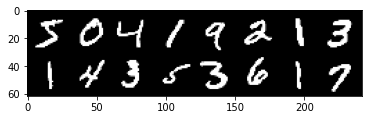

In [7]:
def imshow(img):
    #img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

## get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()

## show images
imshow(torchvision.utils.make_grid(images))

In [8]:
for images, labels in train_loader:
    print("Image batch dimensions:", images.shape)
    print("Image label dimensions:", labels.shape)
    break

Image batch dimensions: torch.Size([16, 1, 28, 28])
Image label dimensions: torch.Size([16])


### Construct the model

In [9]:
class DigitClassifier(nn.Module):
  def __init__(input_size, hidden_sizes):
    self.fc1 = nn.Linear(input_size, hidden_size[0])
    self.fc2 = nn.Linear(hidden_size[0], hidden_size[1])
    self.fc3 = nn.Linear(hidden_size[0], 10)
    
  
  def forward(self, x):
    
    x = self.fc1(x)
    x = F.relu(x)
    x = self.fc2(x)
    x = self.fc3(x)
    return F.log_softmax(x, dim=1) 


  